In [1]:
from google.colab import files
uploaded = files.upload()
!unzip -q data-science-job-salaries.zip

import pandas as pd
df = pd.read_csv("ds_salaries.csv")
df.head()

Saving data-science-job-salaries.zip to data-science-job-salaries.zip


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [2]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Identify and differentiate between quantitative and qualitative data within the dataset.

quantitative:
work_year
salary
salary_in_usd
remote_ratio

qualitative:
experience_level
employment_type
job_title
salary_currency
employee_residence
company_location
company_size

In [5]:
print(df.isnull().sum())
print(f"Qty duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Qty duplicates: 0


In [6]:
grouped = df.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median']).reset_index()
print(grouped)

  experience_level           mean    median
0               EN   61643.318182   56500.0
1               EX  199392.038462  171437.5
2               MI   87996.056338   76940.0
3               SE  138617.292857  135500.0


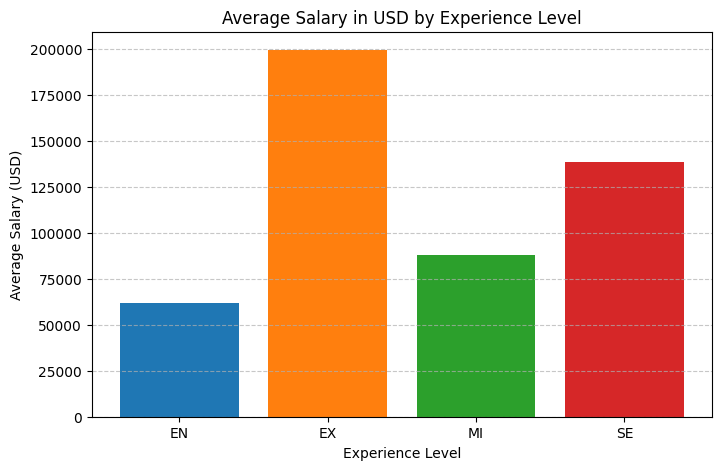

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.bar(grouped['experience_level'], grouped['mean'], color=colors[:len(grouped)])

plt.title('Average Salary in USD by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()